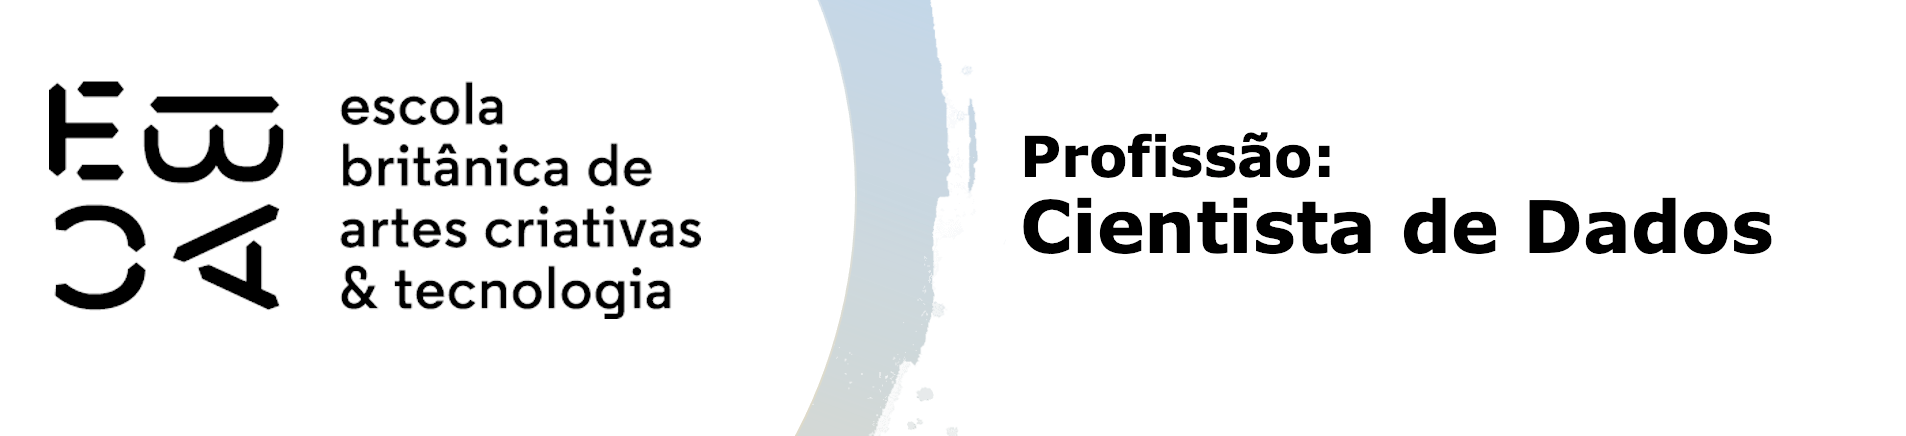

# Métodos hierárquicos de agrupamento

## Dendrograma

Essa palavrinha esquisita vem do grego, *déndron* que significa árvore, então dendrograma é um diagrama de árvore. É uma técnica muito popular nesse tipo de agrupamento para ajudar a escolher o número de grupos a se utilizar através de um gráfico bem simpático.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

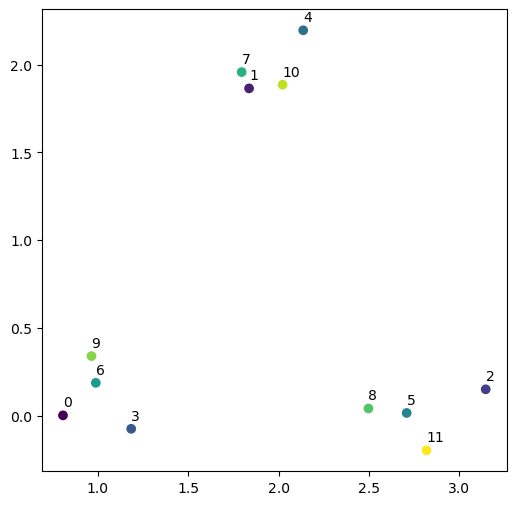

In [5]:
## Gerar os dados
np.random.seed(2360873)
x = np.random.normal([1, 2, 3]*4,.2,12)
y = np.random.normal([0, 2, 0]*4,.2,12)
pontos = pd.DataFrame(np.c_[x,y], columns = ['x', 'y'])
pontos

# Fazer o gráfico
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)

cores = pontos.index.values
ax.scatter(pontos['x'], pontos['y'], c=cores)

for idx, col in pontos.iterrows():
     ax.annotate(idx, (col['x'], col['y']+.05) )

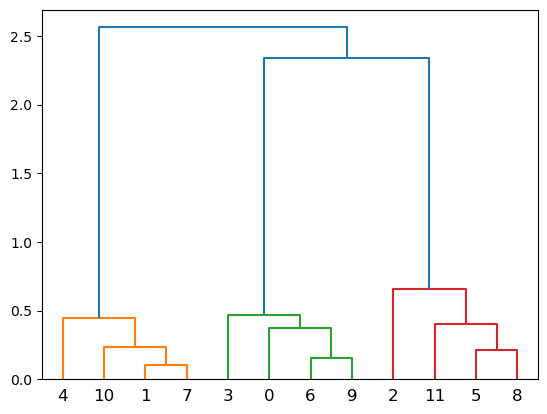

In [6]:
dend = shc.dendrogram(shc.linkage(pontos, method='complete'))

In [7]:
peng = sns.load_dataset('penguins')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
df = peng.select_dtypes('number').dropna()
df_pad = StandardScaler().fit_transform(df)

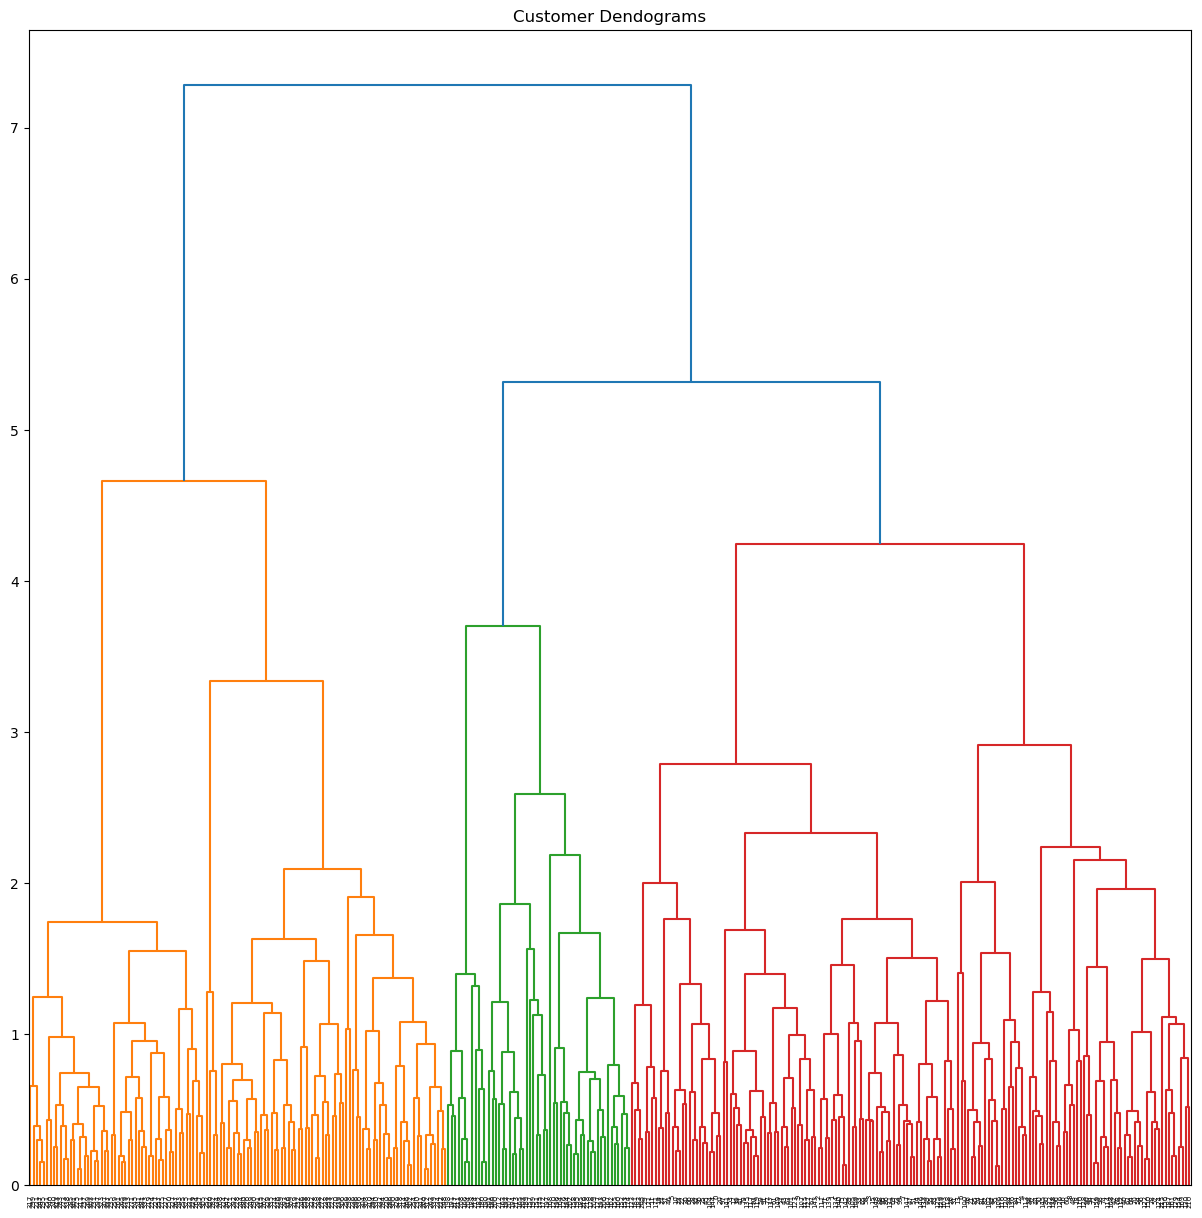

In [9]:
plt.figure(figsize=(15, 15))

plt.title("Customer Dendograms")

dend = shc.dendrogram(shc.linkage(df_pad, method='complete'))